In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def normalized_histogram(img):
  H = np.zeros((256))
  for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
      H[img[i,j]] += 1
  H = H/(img.shape[0]*img.shape[1])
  return H

def equalize(img):
  h = normalized_histogram(img)
  A = np.zeros((256))
  A[0] = h[0]
  for i in range(1, 256):
    A[i] = A[i-1] + h[i]
  Out = np.zeros(img.shape)
  for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
      Out[i,j] = A[img[i,j]]
  return (255*Out).astype('uint8')


def filtering(image, mask):
  shift_row = mask.shape[0]//2
  shift_col = mask.shape[1]//2
  
  new_image = np.zeros((image.shape[0]+2*shift_row,
                        image.shape[1]+2*shift_col), np.float32)
  
  new_image[shift_row:shift_row+image.shape[0], shift_col:shift_col+image.shape[1]] = image
  
  result = np.zeros(new_image.shape, np.float32)
  
  for i in range(shift_row, image.shape[0]+shift_row):
    for j in range(shift_col, image.shape[1]+shift_col):
      aux = new_image[i-shift_row:i+shift_row+1,j-shift_col:j+shift_col+1]
      result[i,j] = np.sum(aux*mask)
  
  return result[shift_row:image.shape[0]+shift_row,shift_col:image.shape[1]+shift_col]

def filtroMediana(image, size):
  shift_row = size//2
  shift_col = size//2
  
  new_image = np.zeros((image.shape[0]+2*shift_row,
                        image.shape[1]+2*shift_col), np.float32)
  
  new_image[shift_row:shift_row+image.shape[0], shift_col:shift_col+image.shape[1]] = image
  
  result = np.zeros(new_image.shape, np.float32)
  
  for i in range(shift_row, image.shape[0]+shift_row):
    for j in range(shift_col, image.shape[1]+shift_col):
      aux = new_image[i-shift_row:i+shift_row+1,j-shift_col:j+shift_col+1]
      val = np.sort(aux, axis=None)
      result[i,j] = val[(size**2)//2]
  
  return result[shift_row:image.shape[0]+shift_row,shift_col:image.shape[1]+shift_col]

# Pregunta 2

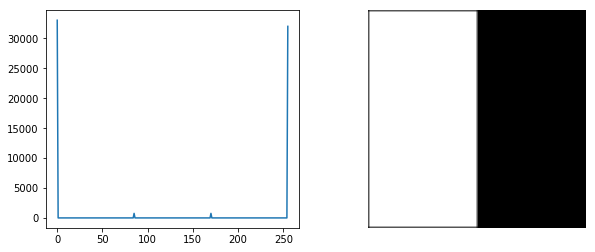

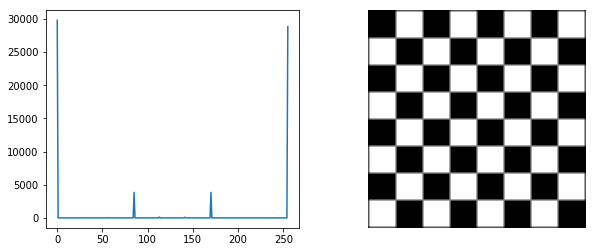

In [0]:
img1 = np.zeros((258,258))
img2 = np.zeros((258,258))

pad = 1

for i in range(pad, 258-pad):
  img1[i, pad:256//2+1] = 255

for i in range(8):
  for j in range(8):
    x = pad + i*256//8
    y = pad + j*256//8
    if (i%2==0 and j%2 != 0) or (i%2!=0 and j%2 == 0):
      img2[x:x+256//8, y:y+256//8] = 255

def histogram(img):
  H = np.zeros((256))
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      H[int(img[i, j])] += 1
  return H

img1 = filtering(img1, 1/9+np.zeros((3,3)))
img2 = filtering(img2, 1/9+np.zeros((3,3)))

h1 = histogram(img1)
h2 = histogram(img2)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(h1)

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(img1, cmap="gray")
plt.show()

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(h2)

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(img2, cmap="gray")
plt.show()

# Pregunta 4

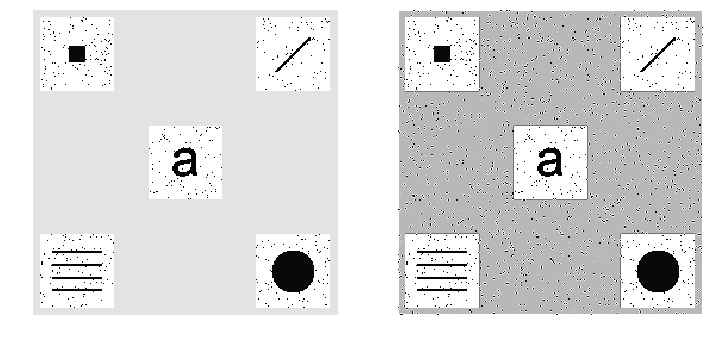

In [102]:
img = cv2.imread("intergalactico.tif", 0)
for i in range(img.shape[0]):
  for j in range(img.shape[0]):
    if img[i,j]==0:
      img[i,j] = 255
res = equalize(img)

mask = np.zeros((3, 3))
mask[0,1] = mask[2,1] = mask[1,0] = mask[1,2] = 1
mask[1,1] = -4

laplacian = filtering(res, mask)
out = res - laplacian
np.clip(out, 0, 255, out=out)
res = out.astype('uint8')

plt.figure(figsize=(12, 12))

plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(img, cmap="gray")

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(res, cmap='gray')

plt.show()